# Fondamenti di Analisi Dati - a.a. 2019/2020

In questo laboratorio vederemo i principali usi della Principal Component Analysis (PCA). Si tratta di una tecnica ampiamente utilizzata per la **riduzione della dimensionalità**, **la compressione dei dati**, l'**estrazione delle feature** e la **visualizzazione dei dati**. L'obiettivo della PCA è quello di trasformare un insieme di dati multivariati in un insieme di variabili decorrelate linearmente dette "componenti principali". Il numero di variabili (o dimensioni) di destinazione può essere minore o uguale a quello di partenza.

## 10.1 Riepilogo sulla formalizzazione di PCA
Prima di vedere degli esempi, riepiloghiamo la formulazione della PCA e le principali caratteristiche. Sia $X$ una matrice $N \times D$ di dati in cui ogni riga rappresenta un diverso elemento e ogni colonna rappresenta una diversa variabile (si tratta di una rappresentazione molto simile a quella dei DataFrame). Assumeremo che ogni colonna di $X$ abbia media nulla. Si noti che è possibile ottenere una matrice con queste caratteristiche a partire da qualunque set di dati sottraendo a ogni colonna la rispettiva media. L'obiettivo della PCA è trovare una matrice $W$ di dimensioni $D \times D$ che proietti i dati di $X$ in un nuovo spazio come segue:

\begin{equation}
Z = XW
\end{equation}

### Proprietà
La matrice dei dati proiettati $Z$ avrà dimensioni $N \times D$ per la quale valgono le seguenti proprietà:
 1. Le "nuove variabili" individuate dalla PCA sono ordinate in **ordinate decrescente di varianza**;
 * La matrice di covarianza dei dati proiettati $Z$ è diagonale (ovvero è pari a zero dappertutto tranne che nella diagonale principale). In altre parole, **le variabili di $Z$ sono decorrelate**.

### Inversa della PCA
Si noti che la trasformazione PCA è invertibile:

\begin{equation}
X = ZW^T
\end{equation}

### Compressione
Dato che variabili a varianza maggiore "contengono maggiore informazione" di variabili a varianza minore, è possibile ridurre la dimensione dei dati di $Z$ conservando la massima quantità di informazione possibile considerando la matrice $W_M$ contenente le prime $M<D$ colonne di $W$ ed effettuando la trasformazione:

\begin{equation}
Z_M = XW_M
\end{equation}

In questo caso, la matrice $Z_M$ avrà dimensione $N \times M$ e dunque avrà un numero di variabili minore di $X$. Per opportune scelte di $M$, $Z_M$ conterrà la maggior parte dell'informazione contenuta in $X$. Si dice dunque che $Z_M$ rappresenta **una versione compressa** di $X$. E' possibile ricostruire (con perdita di informazione) i valori di $X$ a partire dalla versione compressa $Z_M$ mediante la seguente trasformazione inversa:

\begin{equation}
\overline X_M = \overline Z_MW^T
\end{equation}

Dove $\overline X_M$ è la ricostruzione (con perdita) di $X$ a partire da $Z_M$. $\overline Z_M$ è una matrice $N \times D$ così composta:
 * Le prime $M$ righe di $\overline Z_M$ corrispondono alle righe di $Z_M$;
 * Le restanti $D-M$ righe contengono zeri.

### Ottimizzazione
Esistono diversi algoritmi per trovare i pesi $W$ ottimali. Noi utilizzeremo l'implementazione della libreria `scikit-learn` che implementa il calcolo dei parametri della PCA mediante il metodo della Singular Value Decomposition.

## 10.2 Esempio: PCA su dati 2D

Iniziamo considerando un semplice set di dati 2D:

In [1]:
import pandas as pd
set2d=pd.read_csv('Simple2DSet.csv')
print(len(set2d))
set2d.head()

1000


,x,y
0,6.403621,-0.742478
1,2.782241,-4.126082
2,6.354109,-2.308102
3,5.499853,-1.986180
4,5.492006,-5.074300


Il dataset contiene $1000$ elementi. Ogni record del data frame corrisponde a una coppia di valori 2D ($x$,$y$). Visualizziamoli nello spazio 2D:

In [2]:
from matplotlib import pyplot as plt
plt.plot(set2d.x,set2d.y,'o')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

Applichiamo la tecnica della Principal Component Analysis ai dati. A tale scopo, ultilizzeremo l'oggetto `PCA` della libreria `scikit-learn`:

In [3]:
from sklearn.decomposition import PCA

L'oggetto `PCA` segue l'API di scikit-learn e mette a disposizione due metodi principali:
 * `fit`: prende in input $X$ e permette di calcolare i coefficienti della PCA. Il metodo `fit` non richiede che le colonne di $X$ siano a media nulla. Verranno dunque calcolare e conservate le medie delle colonne di $X$ come parte del modello;
 * `transform`: prende in input una matrice di dati (es. $X$) e la trasforma sottraendo prima le medie delle colonne calcolate da `fit` e proiettando in seguito i dati mediante $Z=XW$.

Otteniamo la matrice $X$ dal DataFrame e calcoliamo la PCA dai dati:

In [4]:
X = set2d.values
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Visualizziamo le media delle variabili calcolate da `PCA`:

In [5]:
pca.mean_

array([ 4.98240411, -3.09411727])

Verifichiamo che esse siano in effetti le medie delle due variabili:

In [6]:
set2d.mean()

x    4.982404
y   -3.094117
dtype: float64

In [7]:
print('%.3f'%set2d.x.mean() == '%.3f'%pca.mean_[0])
print('%.3f'%set2d.y.mean() == '%.3f'%pca.mean_[1])

True
True


Visualizziamo i valori trovati per la matrice $W$. Questi vengono riferiti come "components" (le componenti principali):

In [8]:
W=pca.components_
W

array([[ 0.64514558,  0.76405967],
       [ 0.76405967, -0.64514558]])

Possiamo utilizzare l'oggetto $PCA$ per trasformare i dati:

In [9]:
Z = pca.transform(X)

### Interpretazione dei coefficienti della PCA

I coefficienti della PCA hanno una interpretazione geometrica semplice da vedere nel caso 2D. Le due colonne della matrice $W$ rappresentano i due versori del nuovo sistema di riferimento individuato dalla PCA. Verifichiamo innanzitutto che si tratti di due versori:

In [15]:
(W**2).sum(0) #norma uguale a 1

array([1., 1.])

Plottiamo adesso i due vettori sul grafico raffigurante i dati, facendoli partire dal punto medio dei dati. Utilizzeremo a questo scopo la funzione `quiver` di `matplotlib` che ci permtte di rappresentare dei vettori specificando le loro componenti. Per questioni di visualizzazione, passeremo un parametro di scala alla funzione:

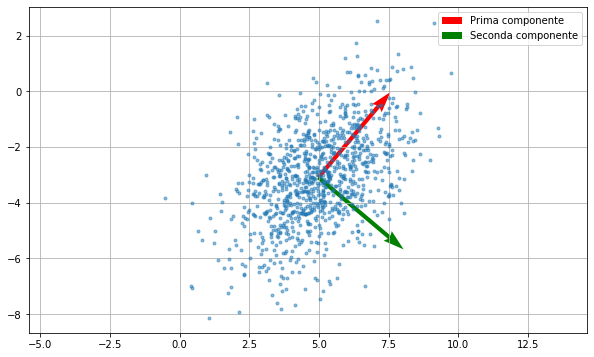

In [16]:
plt.figure(figsize=(10,6))
#specifico alpha=0.5 per visualizzare i punti in trasparenza
plt.plot(set2d.x,set2d.y,'.',alpha=0.5)
#uso la funzione quiver per plottere i vettori
plt.quiver(set2d.x.mean(),set2d.y.mean(),W[0,0],W[1,0], scale=5, color='red', label='Prima componente')
plt.quiver(set2d.x.mean(),set2d.y.mean(),W[0,1],W[1,1], scale=5, color='green', label='Seconda componente')
#impongo che gli assi abbiano la stessa scala
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

I due vettori rappresentano le due componenti principali individuati dalla PCA. In particolare, la prima componente giace lungo la direzione di massima varianza, mentre la seconda componente è perpendicolare alla prima e giace lungo la seconda direzione di massima varianza (la direzione di minima varianza in questo caso).

La proiezione dei dati verrà effettuato proiettando tutti i dati prima lungo l'asse individuato dalla prima componente e successivamente lungo l'asse individuato dalla seconda componente.

### Rototraslazione dei dati

Plottiamo i dati e confrontiamoli con i vecchi:

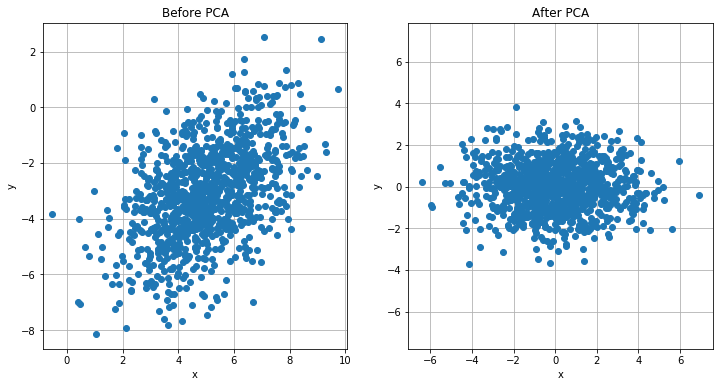

In [62]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Before PCA')
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.title('After PCA')
plt.plot(Z[:,0],Z[:,1],'o')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In pratica, i dati sono stati roto-traslati. In particolare, essi sono stati traslati lungo i due assi $x$ e $y$ in modo da avere media nulla e ruotati in modo che la varianza massima si trovi sull'asse $x$. Ciò fa anche in modo che i dati siano decorrelati.

### Decorrelazione dei dati

Calcoliamo le matrici di covarianza dei due set di dati:

In [21]:
import numpy as np
print(np.cov(X.T))
print()
print(np.cov(Z.T))

[[2.45531835 1.25551632]
 [1.25551632 2.88213855]]

[[3.94225312e+00 3.76964615e-16]
 [3.76964615e-16 1.39520377e+00]]


La matrice di covarianza di $Z$ non è perfettamente diagonale ma, come si può notare, gli elementi al di fuori della diagonale principale sono quasi nulli.

### Riduzione della dimensionalità
Vediamo adesso un semplicissimo esempio di riduzione della dimensionalità sui dati 2D. Nello specifico, proietteremo i dati sulla prima componente principale. Per farlo, `scikit-learn` ci permette di specificare un parametro `n_components` al costruttore di `PCA`:

In [31]:
pca1d = PCA(n_components=1)
pca1d.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Vediamo quali componenti sono stati trovate:

In [32]:
pca1d.components_

array([[0.64514558, 0.76405967]])

Si tratta della prima riga della matrice `W` nel caso della PCA con entrambe le componenti. Verifichiamolo:

In [33]:
print(pca1d.components_,"\n")
print(pca.components_)

[[0.64514558 0.76405967]] 

[[ 0.64514558  0.76405967]
 [ 0.76405967 -0.64514558]]


Effettuiamo la proiezione dei dati:

In [34]:
Z1 = pca1d.transform(X)
Z1.shape

(1000, 1)

I valori ottenuti sono adesso unidimensionali. Tuttavia, in questa operazione, abbiamo perso dell'informazione. Possiamo misurare quanta varianza abbiamo perso dividendo la varianza dei dati proiettati per la varianza totale dei dati prima della trasformazione:

In [35]:
#sommiamo le varianze delle due variabili per ottenere la varianza totale
varianza_totale = set2d.x.var()+set2d.y.var()
varianza_mantenuta = np.var(Z1)

#moltiplichiamo per cento per ottenere un valore in percentuale
print("Percentuale di varianza mantenuta: %0.2f%%" % (varianza_mantenuta*100/varianza_totale))
print("Percentuale di varianza persa: %0.2f%%" % (100-varianza_mantenuta*100/varianza_totale))

Percentuale di varianza mantenuta: 73.79%
Percentuale di varianza persa: 26.21%


In pratica, `scikit-learn` calcola per noi la percentuale di varianza "spiegata" dalla componente i-esima:

In [36]:
pca.explained_variance_ratio_

array([0.7386014, 0.2613986])

Nella componente i-esima del vettore, è riportata la varianza spiegata dalla componente principale i-esima. Se vogliamo sapere quanta varianza manteniamo troncando alla i-esima componente, possiamo applicare `cumsum`:

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7386014, 1.       ])

In questo caso, troncando alla prima componente manteniamo circa il $73.86\%$ dell'informazione. Troncando alla seconda componente (e dunque tenendole tutte), manteniamo il $100\%$ dell'informazione.

## 10.3 PCA per la compressione dei dati
Vediamo adesso un semplice esempio di compressione dati mediante PCA. In particolare, considereremo il caso della compressione di immagini. Una immagine può essere vista come un dato ad alta dimensionalità, dove il numero di dimensioni è pari al numero di pixel. Ad esempio, una immagine RGB di dimensioni $640 \times 480$ pixel, ha $3 \cdot 640 \cdot 480=921600$ dimensioni. Ci aspettiamo che in tutte queste dimensioni ci saranno delle informazioni ridondanti. Un metodo per comprimere le immagini, consiste nel suddividerle in blocchi di dimensione fissa (es. $8 \times 8$). Ognuno di questi blocchetti costituirà un elemento che fa parte di una popolazione (la popolazione dei blocchetti $8 \times 8$ dell'immagine). Supponendo che l'informazione nei blocchetti sia molto correlata, possiamo provare a comprimerla applicando la PCA alla popolazione dei blocchetti e scegliendo solo alcune componenti principali per rappresentare il contenuto dei blocchetti.

Iniziamo caricando una immagine di esempio  mediante `scikit-learn`:

Dimensioni dell'immagine: (427, 640, 3)
Numero di dimensioni: 819840


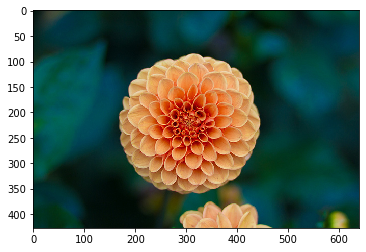

In [38]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('flower.jpg')
print("Dimensioni dell'immagine:",flower.shape)
print("Numero di dimensioni:",np.prod(flower.shape))
plt.imshow(flower)
plt.show()

Divideremo l'immagine in blocchi RGB di dimensioni $8 \times 8 \times 3$ (si tratta di immagini RGB $8\times 8$). Iniziamo trasformando l'immagine in un vettore monodimensionale:

In [39]:
flower_monodimensionale = flower.ravel()
print(flower_monodimensionale.size)

819840


Calcoliamo quanti blocchi $8 \times 8 \times 3$ entrano nell'immagine:

In [40]:
flower_monodimensionale.size/(8*8*3)

4270.0

Utiliziamo la funzione di numpy `split` per suddividere il vettore monodimensionale in $4270$ parti uguali. Questo metodo restituisce una lista. Utilizziamo `stack` di numpy per trasformare la lista di vettori in una matrice:

In [41]:
tiles = np.split(flower.ravel(),4270)
tiles=np.stack(tiles)
tiles.shape

(4270, 192)

Abbiamo ottenuto $4270$ vettori di $192 = 8 \times 8 \times 3$ unità. Ognuno dei vettori è un blocchetto dell'immgine. Proviamo a visualizzarne qualcuno:

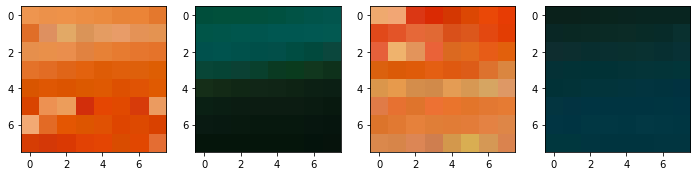

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(141)
plt.imshow(tiles[1634].reshape(8,8,3))
plt.subplot(142)
plt.imshow(tiles[3200].reshape(8,8,3))
plt.subplot(143)
plt.imshow(tiles[1635].reshape(8,8,3))
plt.subplot(144)
plt.imshow(tiles[450].reshape(8,8,3))
plt.show()

Calcoliamo la PCA di tiles:

In [43]:
pca=PCA()
pca.fit(tiles)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Verifichiamo quanta informazione si perde scartando le varie componenti:

In [44]:
np.cumsum(pca.explained_variance_ratio_)[:32] #stampiamo solo i valori relativi alle prime 32 componenti

array([0.72033322, 0.8054948 , 0.88473857, 0.91106289, 0.92773705,
       0.94002709, 0.94742984, 0.95262262, 0.95724086, 0.96138203,
       0.96493482, 0.96813026, 0.97074765, 0.97304417, 0.97502487,
       0.97676849, 0.97827393, 0.97961611, 0.98080084, 0.98195037,
       0.98298693, 0.98399279, 0.98491245, 0.98570784, 0.98649079,
       0.98719466, 0.98779928, 0.98835152, 0.98888528, 0.98937606,
       0.98983658, 0.99027875])

Come possiamo vedere, troncare alla prima componente ci permette di mantenere circa il $72\%$ dell'informazione, troncare alla seconda ci permette di mantenere circa l'$80\%$ e così via, fino a $32$ componenti, che ci permettono di mantenere circa il $99\%$ dell'informazione. Vediamo adesso come comprimere e ricostruire l'immagine. Sceglieremo le prime $32$ componenti, che preservano il $99\%$ dell'informazione:

In [45]:
pca = PCA(n_components=32)
pca.fit(tiles)
compressed_tiles = pca.transform(tiles)
compressed_tiles.shape

(4270, 32)

Abbiamo ottenuto una matrice molto più piccola di quella di partenza. Calcoliamo la percentuale di spazio salvato:

In [46]:
print("Spazio salvato nella compressione: {:0.2f}%".format(100-100*compressed_tiles.size/tiles.size))

Spazio salvato nella compressione: 83.33%


Ricostruiamo adesso l'immagine dalla sua rappresentazione compressa. Per fare ciò `scikit-learn` mette a disposizione il metodo `inverse_transform`:

In [47]:
reconstructed_tiles = pca.inverse_transform(compressed_tiles)
reconstructed_tiles.shape

(4270, 192)

Adesso dobbiamo effettuare i passi inversi per ricomporre l'immagine dalle tiles. Iniziamo normalizzando i valori tra $0$ e $255$. Ciò è necessario per evitare warning (dopo la PCA, i valori RGB potrebbero avere un range leggermente diverso):

In [48]:
reconstructed_tiles = (reconstructed_tiles-reconstructed_tiles.min())\
            /(reconstructed_tiles.max()-reconstructed_tiles.min())*255
#convertiamo il tipo dei dati da float a uint8
reconstructed_tiles=reconstructed_tiles.astype('uint8')

ricomponiamo l'immagine mediante un reshape e visualizziamola vicino all'originale:

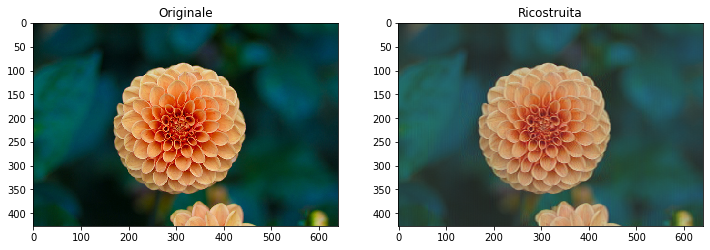

In [49]:
reconstructed_flower=reconstructed_tiles.ravel().reshape(flower.shape)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Originale')
plt.imshow(flower)
plt.subplot(1,2,2)
plt.title('Ricostruita')
plt.imshow(reconstructed_flower)
plt.show()

## 10.4 PCA per la visualizzazione dei dati

La PCA viene utilizzata anche per permettere di visualizzare dati multidimensionali, ad esempio per avere un'idea di come essi si distribuiscono nello spazio. Consideriamo ad esempio il dataset "digits" messo a disposizione della libreria **scikit-learn**:

In [50]:
from sklearn.datasets import load_digits
digits=load_digits()

Si tratta di un dataset di immagini di dimensione $8 \times 8$ pixel raffiguranti numeri scritti a mano. Visualizziamone la descrizione:

In [51]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Le immagini dei caratteri sono contenuti sotto forma di vettori unidimensionali di $64$ elementi. Ad ogni elemento è associata una classe. Visualizziamo un elemento del dataset:

Classe corrispondente: 4


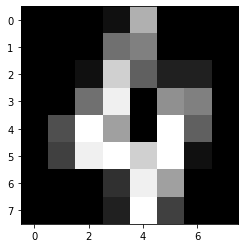

In [60]:
#gli elementi sono contenuti all'interno di digits.data
#si tratta di vettori 1x64, che devono essere trasformati in vettori 8x8 per la visualizzazione
plt.imshow(digits.data[4].reshape((8,8)),cmap='gray')
#le classi sono contenute all'interno di digits.target
print("Classe corrispondente:",digits.target[4])
plt.show()

Per capire come i dati si distribuiscono nello spazio, potremmo visualizzarli nello spazio bidimensionale. Per farlo dobbiamo scartare $62$ dimensioni e tenerne $2$. Per essere sicuri di considerare le due dimensioni "più importanti", trasformiamo prima i dati mediante PCA per "riordinarne" le dimensioni:

In [53]:
#dato che vogliamo solo le prime due componenti principali
#possiamo specificare n_components=2
pca=PCA(n_components=2)
pca.fit(digits.data)
Y=pca.transform(digits.data)

Effettuiamo dunque il plot, classe per classe:

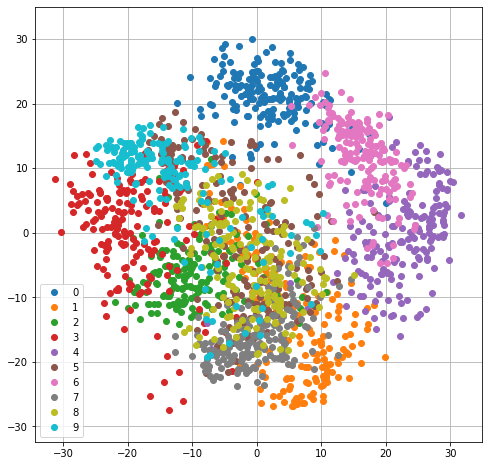

In [98]:
plt.figure(figsize=(8,8))
legend = []
for c in np.unique(digits.target):
    plt.plot(Y[digits.target==c,0],Y[digits.target==c,1],'o')
    legend.append(c)

plt.legend(legend)
plt.grid()
plt.axis('equal')
plt.show()

## - Principal Component Analysis - FINE 